In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
import time
import os

start_time = time.time()

# read file
fileDir = os.path.dirname(os.path.realpath('__file__'))
short_file_name = '../sounds/ttls u3.wav'
file_name = os.path.join(fileDir, short_file_name)
file_name = os.path.abspath(os.path.realpath(file_name))
ref, sample_rate = sf.read(file_name)  # not mp3 please

# set start time
t_start = 0.93
t_end = t_start + 4100.0/44100.0
signal = ref[int(t_start * 44100): int(t_start * 44100) + 4096, 0]
signal_length = len(signal)
print signal_length
fraction_to_show = 48.0
freq_x_series = np.arange(0.0,1.01*44100.0,44100.0/4096.0)

time_string = time.strftime('%x %X')
time_string = time_string.replace(':', '')
time_string = time_string.replace(r'/', '')

4096


## TOP LEFT PLOT

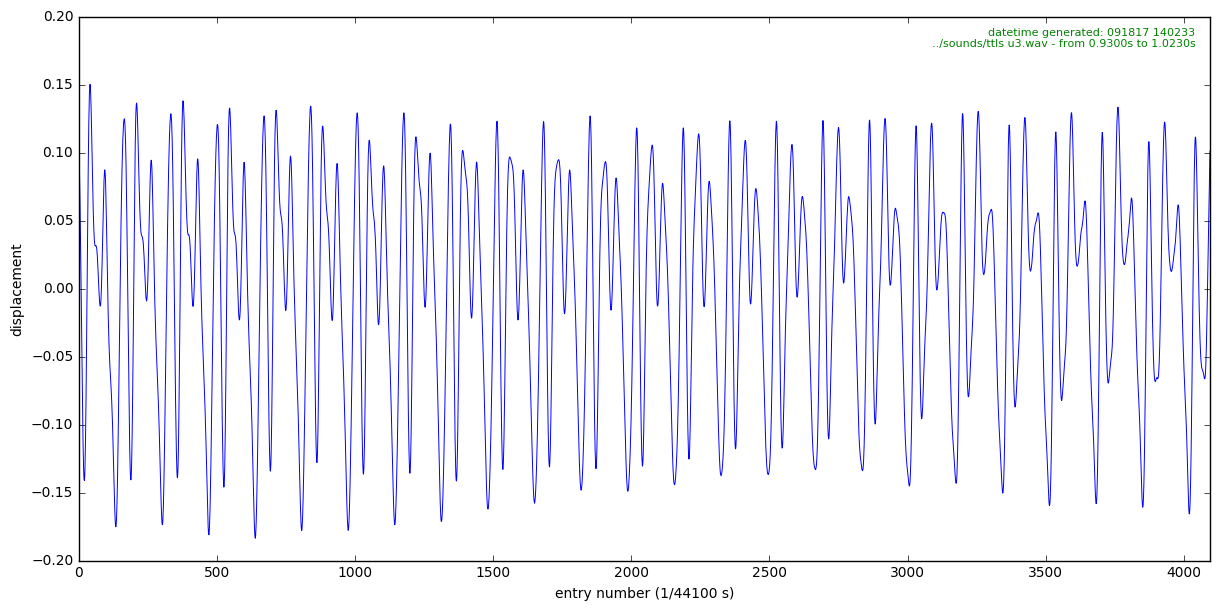

In [10]:
# signal
# plotting code
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.tight_layout()
plt.xlabel("entry number (1/44100 s)")
plt.ylabel("displacement")

annotation = 'datetime generated: {} \n' \
             '{} - from {:.4f}s to {:.4f}s \n ' \
    .format(time_string, short_file_name, t_start, t_end)
ax.text(0.99, 0.98, annotation,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=8)

ax.plot(signal, lw=0.7, color="blue")
# energy = 1.0 / (float(window_size)) ** (1.0 / 4.0) * np.array(energy)
# ax.plot(np.arange(window_size,signal_length), energy, lw=0.02, color="green")
# ax.plot(r_list_x_series, r_list, lw=2.0, color="red")
# plt.plot(derivative, lw=0.2)
# sd.play(signal, sample_rate)

ax.set_xlim([0, 4096])
# plt.savefig("plots/{} {}.svg".format(time_string,"1"), format='svg', bbox_inches='tight')
plt.show()

## BOTTOM LEFT PLOT

[  0.00000000e+00   1.07666016e+01   2.15332031e+01 ...,   4.40677002e+04
   4.40784668e+04   4.40892334e+04]
4096
4096


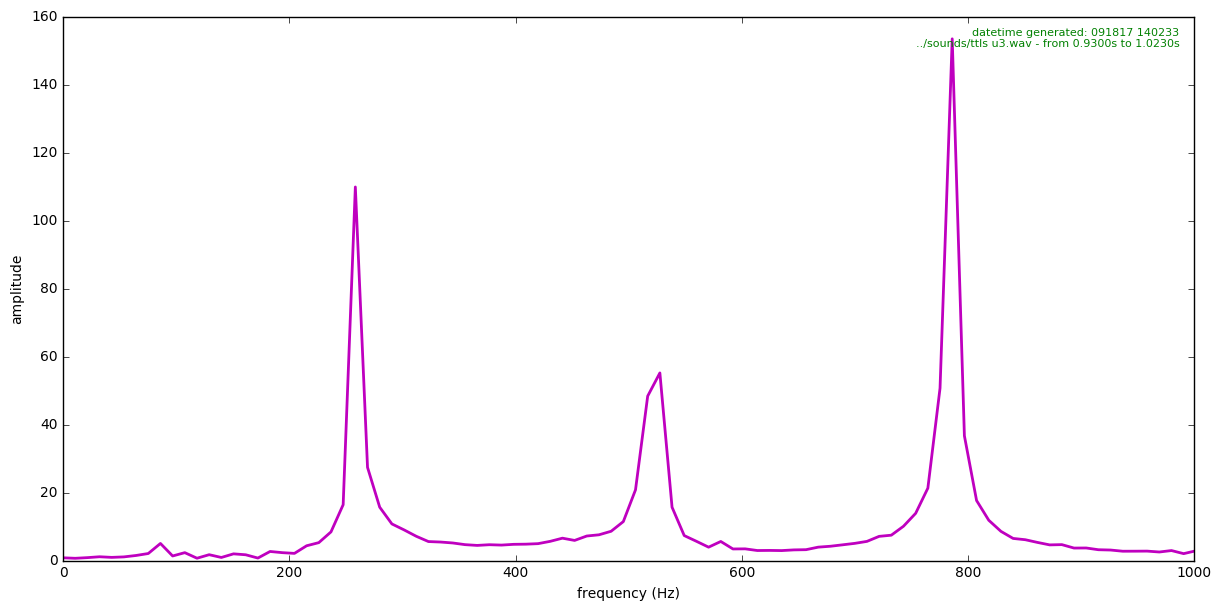

In [11]:
# FFT
transform = np.fft.fft(signal)
transform_real = transform.real
transform_imag = transform.imag

## plotting code - retired
# fig = plt.figure(figsize=(12,6))
# ax = fig.add_subplot(111)
# plt.tight_layout()
#
# # annotation = 'datetime generated: {} \n' \
# #              '{} - from {:.4f}s to {:.4f}s \n ' \
# #     .format(time_string, short_file_name, t_start, t_end)
# ax.text(0.99, 0.98, annotation,
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax.transAxes,
#         color='green', fontsize=8)
#
# ax.plot(transform_real, lw=1.8, color='m')
# ax.plot(transform_imag, lw=1.8, color="orange")
#
# ax.set_xscale('log', basex=2)
# ax.set_xlim([0, int(signal_length/2)])
# plt.savefig("plots/{} {}.svg".format(time_string,"2"), format='svg', bbox_inches='tight')
# plt.show()


#pwm = np.multiply(transform, np.conjugate(transform))
pwm = np.absolute(transform)
pwm = pwm.real

# plotting code
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.tight_layout()
plt.xlabel("frequency (Hz)")
plt.ylabel("amplitude")

# annotation = 'datetime generated: {} \n' \
#              '{} - from {:.4f}s to {:.4f}s \n ' \
#     .format(time_string, short_file_name, t_start, t_end)
ax.text(0.99, 0.98, annotation,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=8)

print freq_x_series[:len(pwm)]
print len(freq_x_series[:len(pwm)])
print len(pwm)
ax.plot(freq_x_series[:len(pwm)], pwm, lw=2.0, color='m')

# ax.set_xscale('log', basex=2) # to plot log scale
ax.set_xlim([0, 1000])
# plt.savefig("plots/{} {}.svg".format(time_string,"2"), format='svg', bbox_inches='tight')
plt.show()

## TOP RIGHT PLOT

2048


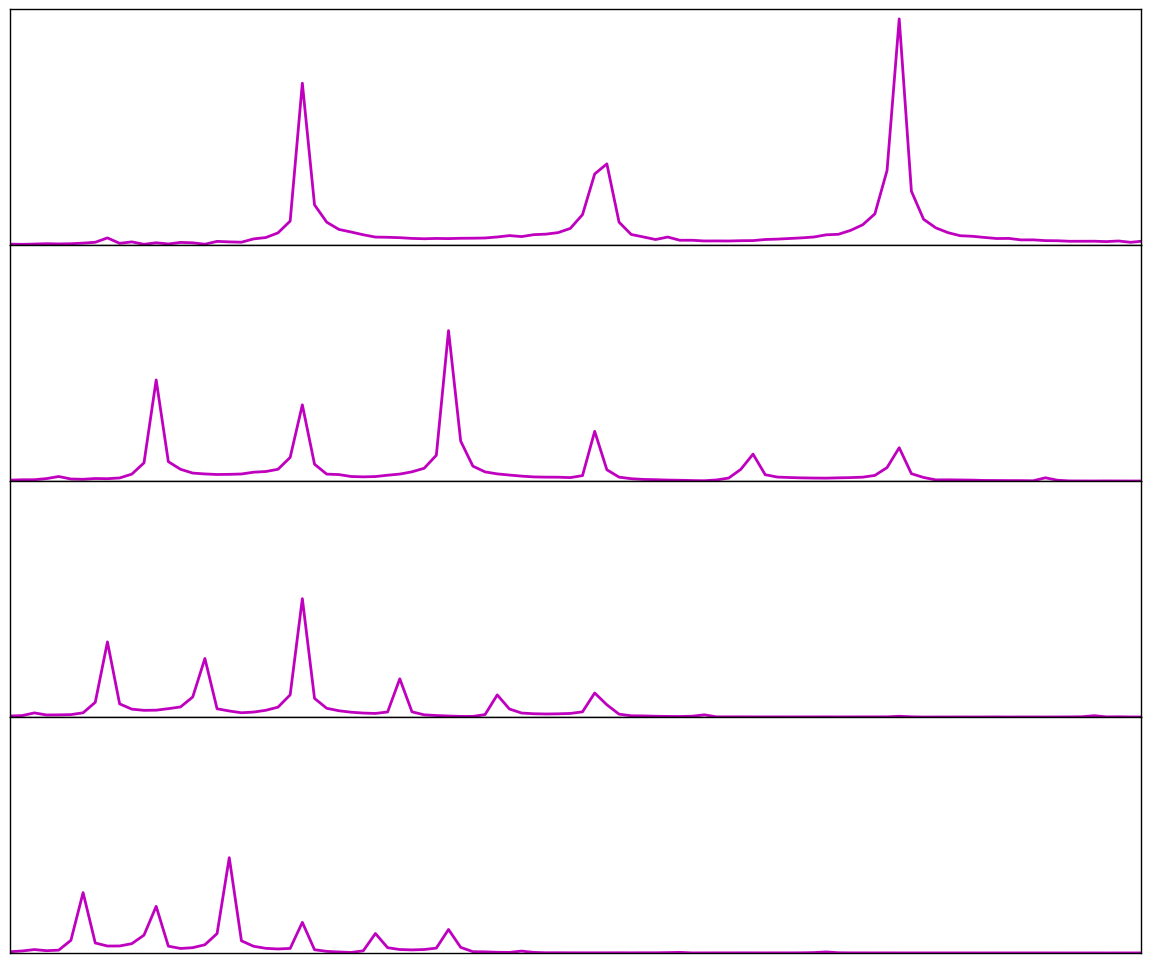

In [12]:
pwm = pwm[:int(signal_length/2)]
print len(pwm)


def downsample(pwm, fraction):
    convolve_result = [0.0] * int(signal_length/2)
    #convolve_result = [1.0] * int(signal_length / 2)
    convolve_full = np.convolve(pwm, [1.0/fraction]*fraction)[fraction-1::fraction]
    convolve_result[:len(convolve_full)] = np.add(convolve_result[:len(convolve_full)], convolve_full)
    return convolve_result

pwm1 = pwm
pwm2 = downsample(pwm, 2)
pwm3 = downsample(pwm, 3)
pwm4 = downsample(pwm, 4)
# pwm5 = downsample(pwm, 5)
# pwm6 = downsample(pwm, 6)


# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True, figsize=(12,10))
plt.tight_layout()

ax1.plot(pwm, lw=2.0, color='m')
ax2.plot(pwm2, lw=2.0, color='m')
ax3.plot(pwm3, lw=2.0, color='m')
ax4.plot(pwm4, lw=2.0, color='m')
# ax5.plot(pwm5, lw=2.0, color='m')
# ax6.plot(pwm6, lw=2.0, color='m')

# ax1.set_xscale('log', basex=2) # to plot log scale
ax1.set_xlim([0, 1000./(44100./4096.)])
f.subplots_adjust(hspace=0)

plt.yticks([])
plt.xticks([])
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
# plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# plt.savefig("plots/{} {}.svg".format(time_string,"3"), format='svg', bbox_inches='tight')
plt.show()

## BOTTOM RIGHT PLOT

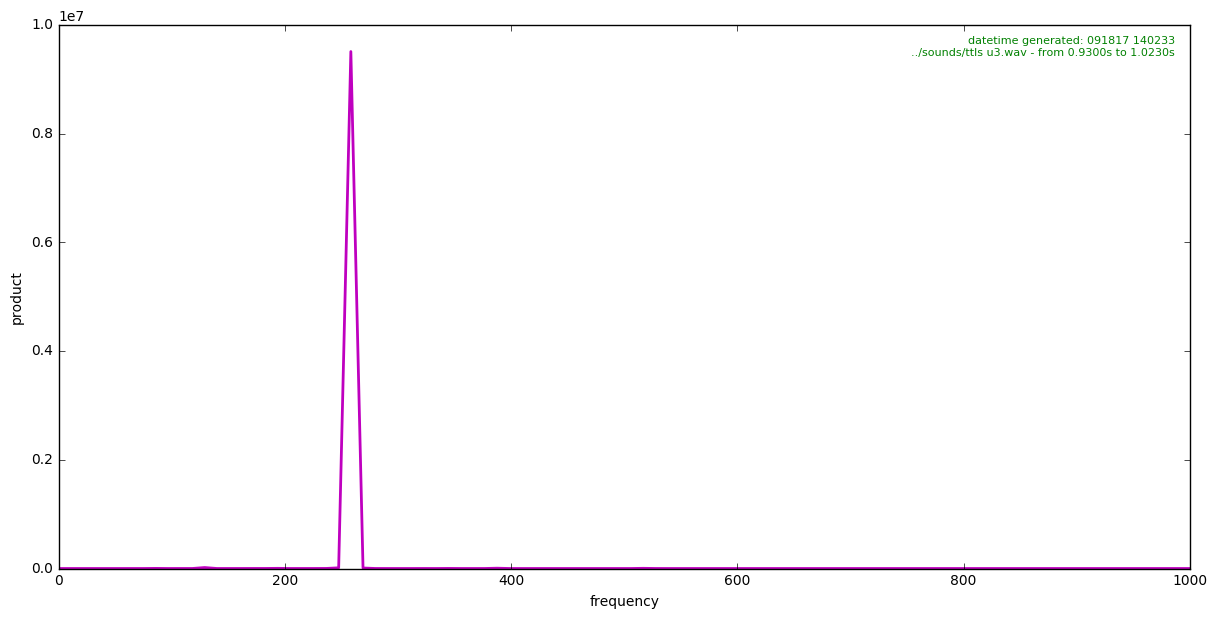

In [13]:
hps = pwm
hps = np.multiply(hps, pwm2)
hps = np.multiply(hps, pwm3)
hps = np.multiply(hps, pwm4)
# hps = np.multiply(hps, pwm5)
# hps = np.multiply(hps, pwm6)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.tight_layout()
plt.xlabel("frequency (Hz)")
plt.ylabel("product")

# annotation = 'datetime generated: {} \n' \
#              '{} - from {:.4f}s to {:.4f}s \n ' \
#     .format(time_string, short_file_name, t_start, t_end)
ax.text(0.99, 0.98, annotation,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=8)

ax.plot(freq_x_series[:len(pwm)], hps, lw=2.0, color='m')

# ax.set_xscale('log', basex=2)  # to plot log scale
ax.set_xlim([0, 1000])
# plt.savefig("plots/{} {}.svg".format(time_string,"4"), format='svg', bbox_inches='tight')
plt.show()